### **Load the Data**

In [ ]:
!pip install catboost
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_train.csv', 
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_test.csv', 
          'edx_test.csv')

### Random Classifier

In [ ]:
import pandas as pd
from sklearn.dummy import DummyClassifier

target = "certified" # target column

# This classifier returns labels sampled uniformly at random
df_train = pd.read_csv('edx_train.csv')
dummy_model = DummyClassifier(strategy="uniform")
dummy_model.fit(df_train.drop(target, axis=1), df_train[target])

DummyClassifier(strategy='uniform')

In [1]:
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')
predictions = dummy_model.predict(df_test)

# Save predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

NameError: name 'pd' is not defined

In [ ]:
import math 

import matplotlib.pyplot as plt              # For plotting
import seaborn as sns                        # For styling plots
import torch                                 # Overall PyTorch import
import torch.nn as nn                        # For specifying neural networks
import torch.nn.functional as F              # For common functions
import torch.optim as optim                  # For optimizizing model parameters
import torchvision.datasets as datasets      # To download data
import torchvision.transforms as transforms  # For pre-processing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# read data
train_data = pd.read_csv('edx_train.csv')
test_data = pd.read_csv('edx_test.csv')
train_data.dtypes

course_id             object
userid_DI             object
registered             int64
viewed                 int64
explored               int64
certified              int64
final_cc_cname_DI     object
LoE_DI                object
YoB                  float64
gender                object
start_time_DI         object
last_event_DI         object
nevents              float64
ndays_act            float64
nplay_video          float64
nchapters            float64
nforum_posts           int64
dtype: object

In [ ]:
#majority class classifier
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=3)

majority_label = train_data['certified'].value_counts().idxmax()
majority_classifier_validation_accuracy = (validation_data['certified'] == majority_label).sum()/len(validation_data)
(validation_data['certified'] == majority_label).sum()/len(validation_data)

# Generate predictions on the test set
predictions = majority_label

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

## Model 1: Decision Tree Classifier

In [ ]:
# Data Preprocessing

#print(train_data.isnull().sum())
features = ['course_id', 'registered', 'viewed', 'explored', 'final_cc_cname_DI', 'nforum_posts']
target = 'certified'

train_data_trimmed = train_data[features + [target]]

# One-Hot Encoding for features
train_data_trimmed = pd.get_dummies(train_data_trimmed)
features = list(train_data_trimmed.columns)
features.remove('certified')

# Train-Validation split
train_dt, val_dt = train_test_split(train_data_trimmed, test_size=0.3, random_state=3)

train_dt[features].head()


,registered,viewed,explored,nforum_posts,course_id_HarvardX/CB22x/2013_Spring,course_id_HarvardX/CS50x/2012,course_id_HarvardX/ER22x/2013_Spring,course_id_HarvardX/PH207x/2012_Fall,course_id_HarvardX/PH278x/2013_Spring,final_cc_cname_DI_Australia,...,final_cc_cname_DI_Pakistan,final_cc_cname_DI_Philippines,final_cc_cname_DI_Poland,final_cc_cname_DI_Portugal,final_cc_cname_DI_Russian Federation,final_cc_cname_DI_Spain,final_cc_cname_DI_Ukraine,final_cc_cname_DI_United Kingdom,final_cc_cname_DI_United States,final_cc_cname_DI_Unknown/Other
3636,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6881,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5480,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4321,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
709,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Fitting Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth = 15)
decision_tree_model = dt_model.fit(train_dt[features], train_dt[target])

dt_train_accuracy = decision_tree_model.score(train_dt[features], train_dt[target])
dt_val_accuracy = decision_tree_model.score(val_dt[features], val_dt[target])

print(dt_train_accuracy)
print(dt_val_accuracy)


0.9433698438592403
0.9238716693855357


In [ ]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'min_samples_leaf': [1, 10, 50, 100, 200, 300],
    'max_depth': [1, 5, 10, 15, 20]
}

search = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = hyperparameters,
    cv = 6, 
    return_train_score = True
)

search.fit(train_dt[features], train_dt[target])

print(search.best_params_)


{'max_depth': 15, 'min_samples_leaf': 10}


In [ ]:
# Preprocessing Test Data
features = ['course_id', 'registered', 'viewed', 'explored', 'final_cc_cname_DI', 'nforum_posts']
test_data_trimmed = test_data[features]

# One-Hot Encoding for Date and Country variables
test_data_trimmed = pd.get_dummies(test_data_trimmed)
features = list(test_data_trimmed.columns)

# Predicting on Test Data
predictions = dt_model.predict(test_data_trimmed[features])

In [ ]:
# Getting Submission CSV

to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

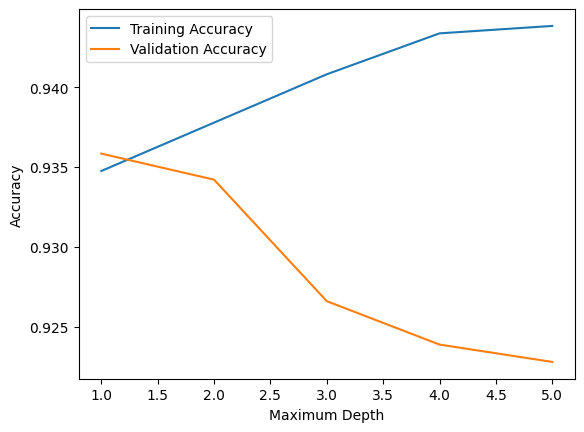

In [ ]:
max_depth_list = [1,5,10,15,20]
train_accuracy = []
val_accuracy = []

for x in max_depth_list:
  dtc = DecisionTreeClassifier(max_depth=x)
  dtc.fit(train_dt[features], train_dt[target])
  train = dtc.predict(train_dt[features])
  val = dtc.predict(val_dt[features])
  train_accuracy.append(accuracy_score(train_dt[target], train))
  val_accuracy.append(accuracy_score(val_dt[target], val))

x = np.arange(len(max_depth_list)) + 1
plt.plot(x, train_accuracy, label='Training Accuracy')
plt.plot(x, val_accuracy, label='Validation Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Model 2: XGBoost

In [ ]:
import math 

import matplotlib.pyplot as plt              # For plotting
import seaborn as sns                        # For styling plots
#import torch                                 # Overall PyTorch import
#import torch.nn as nn                        # For specifying neural networks
#import torch.nn.functional as F              # For common functions
#import torch.optim as optim                  # For optimizizing model parameters
#import torchvision.datasets as datasets      # To download data
#import torchvision.transforms as transforms  # For pre-processing data
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import random
from datetime import datetime

In [ ]:
# read data
train_data = pd.read_csv('edx_train.csv')
test_data = pd.read_csv('edx_test.csv')

In [ ]:
#xgboost
# Extract feature and target arrays
#train_data = train_data.drop('userid_DI', axis=1)
x, y = train_data.drop('certified', axis=1), train_data[['certified']]
# x['date_diff'] = (pd.to_datetime(x['last_event_DI'], infer_datetime_format=True) - pd.to_datetime(x['start_time_DI'], infer_datetime_format=True))
# x['date_diff'] = x['date_diff'].dt.days
# x['date_diff'] = x['date_diff'].fillna(0)

y_encoded = OrdinalEncoder().fit_transform(y)

#xgboost can automatically deal with categorical data
#by casting categorical columns into pandas category type

# Extract text features
cats = x.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
    x[col] = x[col].astype('category')
    
#split 
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=.2, random_state=3)

#convert datasets into xgboost dmatrices
dtrain_reg = xgb.DMatrix(x_train, y_train, enable_categorical=True)
dvalid_reg = xgb.DMatrix(x_valid, y_valid, enable_categorical=True)

params = {"objective": "binary:logistic", "tree_method": "gpu_hist"}
n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

y_pred = model.predict(dvalid_reg)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# n = 1000

# results = xgb.cv(
#    params, dtrain_reg,
#    num_boost_round=n,
#    nfold=5,
#    metrics=["error", 'auc'],
# )

#print(results.keys())
#print(100*results['test-error-mean'].min())
#results['test-auc-mean'].max()

y_pred_train = model.predict(dtrain_reg)
predictions_train = [round(value) for value in y_pred_train]
train_accuracy = accuracy_score(y_train, predictions_train)
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))

Accuracy: 97.55%
Train Accuracy: 99.89%


In [ ]:
acc_data_list = {'XGBoost Validation Accuracy':  [accuracy],
        'XGBoost Training Accuracy': [train_accuracy],
        }

acc_data = pd.DataFrame(acc_data_list)

print(acc_data)

   XGBoost Validation Accuracy  XGBoost Training Accuracy
0                     0.975457                   0.998858


In [ ]:
#xgboost
# Extract text features
df_test = pd.read_csv('edx_test.csv')
cats = df_test.select_dtypes(exclude=np.number).columns.tolist()
df_test_date = df_test
# df_test_date['date_diff'] = (pd.to_datetime(df_test_date['last_event_DI'], infer_datetime_format=True) - pd.to_datetime(df_test_date['start_time_DI'], infer_datetime_format=True))
# df_test_date['date_diff'] = df_test_date['date_diff'].dt.days
# df_test_date['date_diff'] = df_test_date['date_diff'].fillna(0)

# Convert to Pandas category
for col in cats:
    df_test_date[col] = df_test_date[col].astype('category')
    
df_test_reg = xgb.DMatrix(df_test_date, enable_categorical=True)
y_pred = model.predict(df_test_reg)
predictions = [round(value) for value in y_pred]
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

In [ ]:
#xgboost feature tuning
# drop 1 feature each and try 

best_feature = {}

y_encoded = OrdinalEncoder().fit_transform(y)
for column in train_data.columns:
    if column != 'userid_DI' and column != 'certified':
        x, y = train_data.drop('certified', axis=1), train_data[['certified']]
        x = x.drop(column, axis=1)
        #y = y.drop(column, axis=1)
        #xgboost can automatically deal with categorical data
        #by casting categorical columns into pandas category type

        # Extract text features
        cats = x.select_dtypes(exclude=np.number).columns.tolist()

        # Convert to Pandas category
        for col in cats:
            x[col] = x[col].astype('category')

        #split 
        x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=.2, random_state=3)

        #convert datasets into xgboost dmatrices
        dtrain_reg = xgb.DMatrix(x_train, y_train, enable_categorical=True)
        dvalid_reg = xgb.DMatrix(x_valid, y_valid, enable_categorical=True)

        params = {"objective": "binary:logistic", "tree_method": "gpu_hist"}
        n = 100
        model = xgb.train(
           params=params,
           dtrain=dtrain_reg,
           num_boost_round=n,
        )

        y_pred = model.predict(dvalid_reg)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_valid, predictions)
        print("Accuracy: %.2f%%" % (accuracy * 100.0))
        best_feature.update({column: accuracy*100})
best_feature

#         n = 1000

#         results = xgb.cv(
#            params, dtrain_reg,
#            num_boost_round=n,
#            nfold=5,
#            metrics=["error", 'auc'],
#         )

#         print(results.keys())
#         #print(100*results['test-error-mean'].min())
#         results['test-auc-mean'].max()

Accuracy: 97.32%
Accuracy: 97.55%
Accuracy: 97.55%
Accuracy: 97.49%
Accuracy: 97.37%
Accuracy: 97.49%
Accuracy: 97.49%
Accuracy: 97.37%
Accuracy: 97.49%
Accuracy: 97.49%
Accuracy: 96.69%
Accuracy: 96.63%
Accuracy: 97.49%
Accuracy: 97.26%
Accuracy: 97.55%


{'course_id': 97.31735159817352,
 'registered': 97.54566210045662,
 'viewed': 97.54566210045662,
 'explored': 97.48858447488584,
 'final_cc_cname_DI': 97.3744292237443,
 'LoE_DI': 97.48858447488584,
 'YoB': 97.48858447488584,
 'gender': 97.3744292237443,
 'start_time_DI': 97.48858447488584,
 'last_event_DI': 97.48858447488584,
 'nevents': 96.68949771689498,
 'ndays_act': 96.6324200913242,
 'nplay_video': 97.48858447488584,
 'nchapters': 97.26027397260275,
 'nforum_posts': 97.54566210045662}

[Text(0, 0.5, 'Dropped Feature'), Text(0.5, 0, 'Accuracy Score')]

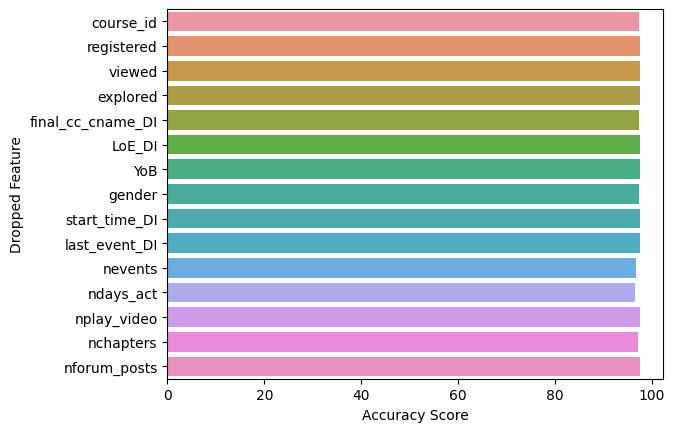

In [ ]:
#barchart of feature accuracy

ax = sns.barplot(y=list(best_feature.keys()), x=list(best_feature.values()))
ax.set(ylabel = 'Dropped Feature', xlabel = 'Accuracy Score')

In [ ]:
#hyperparameter tuning
# randomsearchcv and gridsearchcv don't work with 
# xgb objects not using the sklearn wrapper
# so we implement our own random hyperparameter search
# Extract feature and target arrays
x, y = train_data.drop('certified', axis=1), train_data[['certified']]


y_encoded = OrdinalEncoder().fit_transform(y)

#xgboost can automatically deal with categorical data
#by casting categorical columns into pandas category type

# Extract text features
cats = x.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
    x[col] = x[col].astype('category')
    
#split 
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=.2, random_state=3)
pos_weight = len(y_train[y_train['certified']==0])/len(y_train[y_train['certified']==1])

#convert datasets into xgboost dmatrices
dtrain_reg = xgb.DMatrix(x_train, y_train, enable_categorical=True)
dvalid_reg = xgb.DMatrix(x_valid, y_valid, enable_categorical=True)
best_accuracy = 0
best_accuracy_train = 0
best_parameters = {}
acc_list = []
random_search = []
for i in range(100):
    print(i)
    params = {"objective": "binary:logistic", "tree_method": "gpu_hist", 
              'scale_pos_weight': pos_weight + random.uniform(-1,1), 
              "max_depth": random.randint(0,20), "eta": random.uniform(0,1), "gamma": random.uniform(0,100),
             "subsample": random.uniform(0,1), "lambda": random.uniform(0,16), "alpha": random.uniform(0,16)}
    n = random.randint(25,2000)
    model = xgb.train(
       params=params,
       dtrain=dtrain_reg,
       num_boost_round=n,
    )

    y_pred = model.predict(dvalid_reg)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_valid, predictions)
    y_pred_train = model.predict(dtrain_reg)
    predictions_train = [round(value) for value in y_pred_train]
    train_accuracy = accuracy_score(y_train, predictions_train)
    random_search.append(accuracy*100.0)
    if (accuracy * 100.0 > best_accuracy):
        print("Accuracy: %.2f%%" % (accuracy * 100.0))
        print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
        best_accuracy = accuracy * 100
        best_parameters = {accuracy*100.0: params}
        acc_list.append((best_accuracy, train_accuracy*100.0, params))

    # n = 1000

    # results = xgb.cv(
    #    params, dtrain_reg,
    #    num_boost_round=n,
    #    nfold=5,
    #    metrics=["error", 'auc'],
    # )

    #print(results.keys())
    #print(100*results['test-error-mean'].min())
    #results['test-auc-mean'].max()

#     y_pred_train = model.predict(dtrain_reg)
#     predictions_train = [round(value) for value in y_pred_train]
#     train_accuracy = accuracy_score(y_train, predictions_train)
#     if (train_accuracy * 100.0 >= best_accuracy_train):
#         best_accuracy_train = train_accuracy * 100
#         print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
#random_search_df = pd.DataFrame(random_search)

0
Accuracy: 96.63%
Train Accuracy: 96.77%
1
Accuracy: 97.03%
Train Accuracy: 97.15%
2
Accuracy: 97.15%
Train Accuracy: 97.22%
3
4
5
6
7


KeyboardInterrupt: ignored


## Model 3: Catboost

In [ ]:
from catboost import CatBoostClassifier, Pool


x = train_data.drop('certified', axis=1)
#x = train_data.drop('userid_DI', axis=1)
y = train_data[['certified']]
# x['date_diff'] = (pd.to_datetime(x['last_event_DI'], infer_datetime_format=True) - pd.to_datetime(x['start_time_DI'], infer_datetime_format=True))
# x['date_diff'] = x['date_diff'].dt.days
# x['date_diff'] = x['date_diff'].fillna(0)
x['LoE_DI'] = x['LoE_DI'].fillna('None')
x['gender'] = x['gender'].fillna('None')
x['start_time_DI'] = x['start_time_DI'].fillna('None')
x['last_event_DI'] = x['last_event_DI'].fillna('None')
# categorical_features_indices = np.where(x.dtypes != np.float)[0]
    
#split 

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=.2, random_state=3)
pool_train = Pool(x_train, y_train,
                  cat_features = ['course_id','userid_DI','registered','viewed','explored','final_cc_cname_DI','LoE_DI','gender','start_time_DI','last_event_DI'])

pool_test = Pool(x_valid, cat_features = ['course_id','userid_DI','registered','viewed','explored','final_cc_cname_DI','LoE_DI','gender','start_time_DI','last_event_DI'])

In [ ]:
#predict

cat = CatBoostClassifier(task_type="GPU")
cat.fit(pool_train,plot=True)
y_pred = cat.predict(pool_test)

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

y_pred_train = cat.predict(pool_train)
predictions_train = [round(value) for value in y_pred_train]
train_accuracy = accuracy_score(y_train, predictions_train)
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.030288
0:	learn: 0.6293699	total: 53.8ms	remaining: 53.8s
1:	learn: 0.5716005	total: 97.8ms	remaining: 48.8s
2:	learn: 0.5268586	total: 138ms	remaining: 45.8s
3:	learn: 0.4797080	total: 181ms	remaining: 45.1s
4:	learn: 0.4394795	total: 220ms	remaining: 43.8s
5:	learn: 0.4032063	total: 257ms	remaining: 42.5s
6:	learn: 0.3782920	total: 289ms	remaining: 41s
7:	learn: 0.3545716	total: 328ms	remaining: 40.7s
8:	learn: 0.3286119	total: 371ms	remaining: 40.8s
9:	learn: 0.3099777	total: 415ms	remaining: 41.1s
10:	learn: 0.2886200	total: 453ms	remaining: 40.7s
11:	learn: 0.2696556	total: 491ms	remaining: 40.4s
12:	learn: 0.2524495	total: 531ms	remaining: 40.3s
13:	learn: 0.2387288	total: 573ms	remaining: 40.4s
14:	learn: 0.2257717	total: 629ms	remaining: 41.3s
15:	learn: 0.2161925	total: 669ms	remaining: 41.2s
16:	learn: 0.2068672	total: 719ms	remaining: 41.6s
17:	learn: 0.1976948	total: 754ms	remaining: 41.1s
18:	learn: 0.1895459	total: 793ms	remaining: 41s
19:	learn: 0.

In [ ]:
#add accuracy data for future plotting comparison
acc_data['Catboost Validation Accuracy'] = [accuracy]
acc_data['Catboost Training Accuracy'] = [train_accuracy]

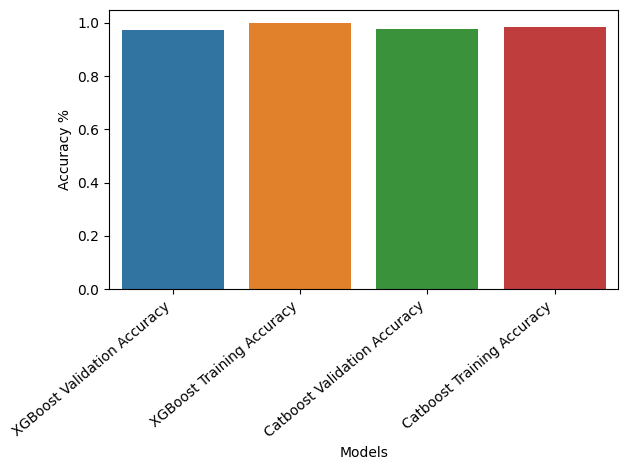

In [ ]:
#compare accuracy data
acc_data
ax = sns.barplot(data=acc_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Models', ylabel='Accuracy %')
plt.tight_layout()
plt.show()

In [ ]:
#catboost random hyperparameter search
import random
best_accuracy = 0
best_accuracy_train = 0
best_parameters = {}
acc_list = []
for i in range(5000):
    print(i)
    cat = CatBoostClassifier(iterations = random.randint(10, 100), 
                             learning_rate = random.uniform(.01, .10), 
                             depth = random.randint(1, 10), task_type="GPU", verbose=False)
    cat.fit(pool_train,plot=False)
    
    y_pred = cat.predict(pool_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_valid, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    y_pred_train = cat.predict(pool_train)
    predictions_train = [round(value) for value in y_pred_train]
    train_accuracy = accuracy_score(y_train, predictions_train)
    print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
    
    if (accuracy * 100.0 > best_accuracy):
        print("New highest Accuracy: %.2f%%" % (accuracy * 100.0))
        print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
        best_accuracy = accuracy * 100
        best_parameters = {accuracy*100.0: params}
        acc_list.append((best_accuracy, train_accuracy*100.0, params))

0
Accuracy: 97.15%
Train Accuracy: 97.63%
New highest Accuracy: 97.15%
Train Accuracy: 97.63%
1
Accuracy: 96.92%
Train Accuracy: 97.20%
2
Accuracy: 96.97%
Train Accuracy: 96.99%
3
Accuracy: 97.15%
Train Accuracy: 97.60%
4
Accuracy: 97.09%
Train Accuracy: 97.46%
5
Accuracy: 96.69%
Train Accuracy: 96.73%
6
Accuracy: 97.03%
Train Accuracy: 97.19%
7
Accuracy: 96.86%
Train Accuracy: 96.85%
8
Accuracy: 96.69%
Train Accuracy: 96.25%
9
Accuracy: 96.86%
Train Accuracy: 96.62%
10
Accuracy: 96.92%
Train Accuracy: 97.13%
11
Accuracy: 97.09%
Train Accuracy: 97.32%
12
Accuracy: 97.15%
Train Accuracy: 97.64%
13
Accuracy: 96.80%
Train Accuracy: 96.67%
14
Accuracy: 97.26%
Train Accuracy: 97.96%
New highest Accuracy: 97.26%
Train Accuracy: 97.96%
15
Accuracy: 96.75%
Train Accuracy: 96.86%
16
Accuracy: 96.00%
Train Accuracy: 95.76%
17
Accuracy: 96.86%
Train Accuracy: 96.92%
18
Accuracy: 97.03%
Train Accuracy: 97.19%
19
Accuracy: 96.86%
Train Accuracy: 96.76%
20
Accuracy: 96.80%
Train Accuracy: 96.83%
21


KeyboardInterrupt: ignored

In [ ]:
#modify test file
df_test = pd.read_csv('edx_test.csv')
df_test_reg = df_test
df_test_reg['LoE_DI'] = df_test['LoE_DI'].fillna('None')
df_test_reg['gender'] = df_test_reg['gender'].fillna('None')
# df_test_reg['date_diff'] = (pd.to_datetime(df_test_reg['last_event_DI'], infer_datetime_format=True) - pd.to_datetime(df_test_reg['start_time_DI'], infer_datetime_format=True))
# df_test_reg['date_diff'] = df_test_reg['date_diff'].dt.days
# df_test_reg['date_diff'] = df_test_reg['date_diff'].fillna(0)
df_test_reg['start_time_DI'] = df_test_reg['start_time_DI'].fillna('None')
df_test_reg['last_event_DI'] = df_test_reg['last_event_DI'].fillna('None')
df_test_reg
pool_test = Pool(df_test_reg, cat_features = ['course_id','userid_DI','registered','viewed','explored','final_cc_cname_DI','LoE_DI','gender','start_time_DI','last_event_DI'])

In [ ]:
#save predictions
cb_pred = cat.predict(df_test_reg)
predictions = [round(value) for value in cb_pred]
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

### **Discussion**



Decision Tree Classifier:
The first model we tried was a Decision Tree classifier. There were a few columns with several null observations, so we restricted the features to the ones we thought were important (as discussed in the next section). The hyperparameters we used were the maximum tree depth and the minimum samples in leaf nodes, which seemed important to prevent the tree from growing too complex.

XGBoost & Catboost:

We implemented our own randomsearch for the hyperparameters of XGBoost & Catboost. We created our own implementation as we had to use the non-sklearn API for their objects in order to for them to handle categorical data more easily. We let these searches run for thousands of iterations each, but they never managed to produce a set of hyperparameters which improved either model's validation accuracy past their default parameters.


#### Feature Selection

For the Decision Tree model, as mentioned above, we dropped columns that had a large number of missing values. The features we retained were ones that we thought were important and had no missing values: 'course_id', 'registered', 'viewed', 'explored', 'final_cc_cname_DI', 'nforum_posts'. From a contextual standpoint, we felt these features would have the highest likelihood of explaining whether a student would complete a course or not.


For XGBoost and Catboost, we used all features available in the dataset. Dropping userid_DI had no effect on accuracy so we did not bother so as to avoid the hassle. XGboost automatically handled encoding categorical data without issue. Catboost also did, but required us to manually rename NAN elements in categorical columns to a string. We also tried calculating the difference in days between start time and last event, as having a small gap inbetween the start time and last event means that the user has not interacted with the course recently, and replacing NANs from this difference with 0 for 0 days. Intuitively this additional feature would be predictive of whether or not the user completed the certificate. Adding this feature slightly increased our xgboost accuracy, but slightly decreased our catboost accuracy, and since the default catboost validation accuracy was still the highest, we chose that as our final model. We also tried manually replacing predictions with 0 whenever last_event_DI was nan, but both XGBoost and Catboost managed to learn this rule perfectly as doing this resulted in identical accuracy to the models' original predictions. To detect which features were important, we iteratively dropped a feature and re-ran our XGboost model, but this had minimal effect on accuracy. We could have also tried dropping combinations of features, but felt this would take too long to run and be too complex.

The final model we decided on was Catboost with default parameters. This achieved the highest validation accuracy of 97.6%. XGBoost with the added feature for day difference between start_time_DI and last_event_DI came in second. Our decision tree model came in last at 92.387%.